# Trexquant Interview Project (The Hangman Game)

* Copyright Trexquant Investment LP. All Rights Reserved.
* Redistribution of this question without written consent from Trexquant is prohibited

## Instruction:
For this coding test, your mission is to write an algorithm that plays the game of Hangman through our API server.

When a user plays Hangman, the server first selects a secret word at random from a list. The server then returns a row of underscores (space separated)—one for each letter in the secret word—and asks the user to guess a letter. If the user guesses a letter that is in the word, the word is redisplayed with all instances of that letter shown in the correct positions, along with any letters correctly guessed on previous turns. If the letter does not appear in the word, the user is charged with an incorrect guess. The user keeps guessing letters until either (1) the user has correctly guessed all the letters in the word
or (2) the user has made six incorrect guesses.

You are required to write a "guess" function that takes current word (with underscores) as input and returns a guess letter. You will use the API codes below to play 1,000 Hangman games. You have the opportunity to practice before you want to start recording your game results.

Your algorithm is permitted to use a training set of approximately 250,000 dictionary words. Your algorithm will be tested on an entirely disjoint set of 250,000 dictionary words. Please note that this means the words that you will ultimately be tested on do NOT appear in the dictionary that you are given. You are not permitted to use any dictionary other than the training dictionary we provided. This requirement will be strictly enforced by code review.

You are provided with a basic, working algorithm. This algorithm will match the provided masked string (e.g. a _ _ l e) to all possible words in the dictionary, tabulate the frequency of letters appearing in these possible words, and then guess the letter with the highest frequency of appearence that has not already been guessed. If there are no remaining words that match then it will default back to the character frequency distribution of the entire dictionary.

This benchmark strategy is successful approximately 18% of the time. Your task is to design an algorithm that significantly outperforms this benchmark.

In [17]:
HANGMAN_URL = "https://www.trexsim.com/trexsim/hangman"

In [18]:
import json
import requests
import random
import logging
import string
import secrets
import time
import re
import collections

try:
    from urllib.parse import parse_qs, urlencode, urlparse
except ImportError:
    from urlparse import parse_qs, urlparse
    from urllib import urlencode

from requests.packages.urllib3.exceptions import InsecureRequestWarning

requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [19]:
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import requests
import time
import json
import re
import collections

In [20]:
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
from statistics import mean
from sklearn.model_selection import train_test_split

In [24]:
import matplotlib
import matplotlib.pyplot as plt

# Data Preprocessing and EDA

In [21]:
vowels = ['a','e','i','o','u']

##### Interpretation of the Histogram:
The histogram shows the distribution of vowel ratios (the ratio of vowels to the total length of the word) across all the words in the dataset.
The majority of words have a vowel ratio between 0.3 and 0.5.
There is a notable peak around the 0.4 mark, indicating that many words have about 40% of their characters as vowels.

count    227300.000000
mean          0.386889
std           0.095527
min           0.000000
25%           0.333333
50%           0.384615
75%           0.444444
max           1.000000
dtype: float64


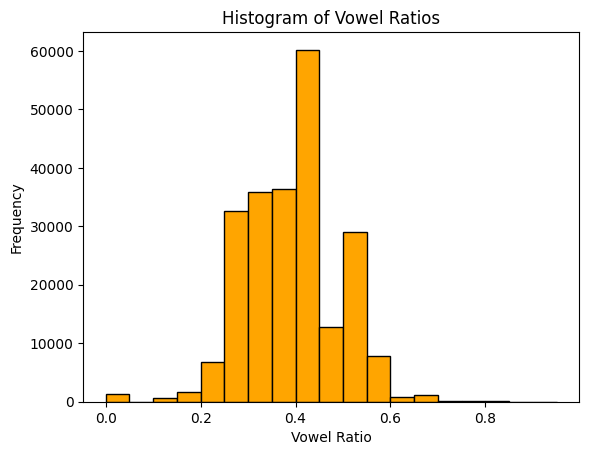

Maximum word length in dataset: 29


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def vowel_count(clean_word):
    count = sum(1 for i in clean_word if i in "aeiou")  # Count vowels in the word
    return count / len(clean_word) if len(clean_word) > 0 else 0  # Return ratio of vowels to word length

# Load the word list from the file
with open("words_250000_train.txt", "r") as file:
    data = [line.strip() for line in file.readlines()]  # Strip newline characters

# Calculate vowel ratio for each word
vowel_ratios = [vowel_count(word) for word in data]
vowel_ratios_series = pd.Series(vowel_ratios)

# Display descriptive statistics of vowel ratios
print(vowel_ratios_series.describe())

# Plot histogram of vowel ratios
bins = np.arange(0.0, 1.0, 0.05)
plt.hist(vowel_ratios, bins=bins, edgecolor='black', color = 'orange')
plt.xlabel('Vowel Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Vowel Ratios')
plt.show()

# Find the maximum length of words in the dataset
max_length = max(len(word) for word in data)
print(f"Maximum word length in dataset: {max_length}")


#### Statistical Analyses
This code is designed to process a dataset of words by first identifying the maximum word length and then generating a dictionary of substrings (`substrdict`) categorized by length. The substrings range from 3 characters up to the length of the longest word in the dataset. The `find` function is used to count how many unique words in the provided dictionary contain each letter, considering only the presence of the letter rather than its frequency within individual words. The `find_stat` function then filters the `substrdict` to generate a list of words that match a given pattern (`clean_word`) and are of the same length.

In [23]:
import collections
import re

# Comment: Statistically, words with a vowel ratio greater than 0.5 are uncommon based on the histogram.
# Find the maximum word length in the dataset
max_length = max(len(words) for words in data)


# to improve the informaiton we get from the data, I've tried to extract more strings from the data

# here, we create a dictionary to store all possible substrings of lengths from 3 to max_length
substrdict = {i: [] for i in range(3, 30)}
count = 3
while count <= max_length:
    for words in data:
        if len(words) >= count:
            for i in range(len(words) - count + 1):
                substrdict[count].append(words[i:i + count])
    count += 1

# Function to count the occurrence of each letter across all unique words in new_dictionary
def find(new_dictionary):
    dictx = collections.Counter()
    for words in new_dictionary:
        temp = collections.Counter(words)
        for i in temp:
            temp[i] = 1  # Only count the presence of the letter (not the frequency within a word)
            dictx += temp
    return dictx

# Function to generate a list of words from substrdict that match the given clean_word pattern
def find_stat(substrdict, clean_word):
    new_dictionary = []
    l = len(clean_word)
    for dict_word in substrdict[l]:
        if re.match(clean_word, dict_word):
            new_dictionary.append(dict_word)
    return new_dictionary

In [25]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10
obscured_string_len = 27

# create logger
logger = logging.getLogger('root')

In [26]:
import torch
import torch.nn as nn

class DQN(nn.Module):

    def __init__(self):
        super(DQN, self).__init__()
        num_classes = 26
        num_layers = 1
        input_size = 27
        hidden_size = 32
        seq_length = 27

        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size+26, num_classes) #fully connected 1
        # self.softmax = nn.LogSoftmax(dim=2)
        self.fc = nn.Linear(num_classes, num_classes) #fully connected last layer

        self.relu = nn.ReLU()

    def forward(self,word, actions):
        logger.debug("Forwad:word shape = {0}".format(word.shape))
        logger.debug("Forward:actions shape = {0}".format(actions.shape))
        logger.debug("Forward:actions = {0}".format(actions))
        logger.debug("Forward:word = {0}".format(word))
        output, (hn, cn) = self.lstm(word.float()) # lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        logger.debug("Forward: hn shape = {0}".format(hn.shape))
        combined = torch.cat((hn, actions), 1)
        out = self.relu(combined)
        logger.debug("Forward: combined shape = {0}".format(combined.shape))
        out = self.fc_1(out) #first Dense
        out = self.fc(out)
        logger.debug("Forward: Out = {0}".format(out))
        return out

In [ ]:
def get_hangman_words():
    # Using the words that fall within the 50% length range from the provided file
    with open("words_250000_train.txt", "r") as file:
        words = [line.strip() for line in file.readlines()]

    # Calculate the length of each word
    word_lengths = [len(word) for word in words]

    # Calculate the average length of words
    average_length = sum(word_lengths) / len(word_lengths)

    # Sort the word lengths to find the 50% range
    sorted_lengths = sorted(word_lengths)

    # Determine the 25th and 75th percentiles (to capture the middle 50%)
    lower_percentile = int(len(sorted_lengths) * 0.25)
    upper_percentile = int(len(sorted_lengths) * 0.75)

    # Get the lengths that fall within the 50% range
    length_range_set = set(sorted_lengths[lower_percentile:upper_percentile])

    # Find words that fall within this length range
    word_list = [word for word in words if len(word) in length_range_set]

    unique_set = set()
    unique_list = []
    duplicates = []

    for item in word_list:
        if item not in unique_set:
            unique_set.add(item)
            unique_list.append(item)
        else:
            duplicates.append(item)

    # Print duplicates and unique list if needed
    # print(f"Duplicates: {duplicates}")
    # print(f"Unique list: {unique_list}")

    return unique_list



In [28]:
def train_model(word_list, letfreq, epochs, epsilon_decay=0.995):
    epsilon = 1.0  # Start with a high epsilon
    win_ratios = []  # Initialize win ratios list
    for epoch in range(epochs):
        win_count = 0
        epsilon *= epsilon_decay  # Reduce epsilon each epoch
        for word in word_list:
            result, _ = hangman(word, letfreq, epochs)
            if "_" not in result:  # A win if no underscores are left in the result
                win_count += 1
        win_ratio = win_count / len(word_list)  # Calculate win ratio for this epoch
        win_ratios.append(win_ratio)  # Append win ratio for this epoch to list
    return win_ratios  # Return the list of win ratios


def evaluate_test_words(testset, letfreq):
    print("\nEvaluating on custom words:")
    wins = 0  # Number of games won
    totaltrials = len(testset)  # Total number of games
    for word in testset:
        result, _ = hangman(word, letfreq, epochs = 1)
        win = "_" not in result  # A win if no underscores are left in the result
        print(f"For the word: {word}, the guess is: {result} and the result is: {'Win' if win else 'Lose'}")
        if win:
            wins += 1
    winrate = (wins / totaltrials) * 100  # Calculate win percentage
    print(f"win %: {round(winrate, 2)}%, wins: {wins}, total: {totaltrials}")

In [29]:
def freqcalc_char(word_list):
    # Concatenate all words into a single string
    all_letters = "".join(word_list)

    # Count the occurrences of each letter
    letter_counts = Counter(all_letters)

    # Calculate the total number of letters
    total_letters = sum(letter_counts.values())

    # Calculate the frequency of each letter as a proportion of the total
    letter_frequency = {letter: count / total_letters for letter, count in letter_counts.items()}

    return letter_frequency


# Epsilon Greedy strat to make the next choice
def choice(state, letfreq, epsilon=0.1):
    global count_moves
    count_moves += 1  # Increase action count for each guess
    vowels = set("aeiou")
    consonants = set("bcdfghjklmnpqrstvwxyz")
    # Extract top quartile of most frequently occuring consonants
    most_freq_consonants = [k for k, v in sorted(letfreq.items(), key=lambda item: item[1], reverse=True) if k in consonants][:len(consonants)//4]
    # Initialize
    if state in qtab and np.random.rand() > epsilon:
        max_q_value = max(qtab[state].values())
        choices_max = [action for action, q_value in qtab[state].items() if q_value == max_q_value]
        best_choice = max(choices_max, key=lambda action: letfreq.get(action, 0))
    else:
        remaining_letters = set("abcdefghijklmnopqrstuvwxyz") - set(state[2])
        best_choice = random.choice(list(remaining_letters))
    # First two guesses should be vowels
    if count_moves == 1 or count_moves == 2:
        remaining_vowels = vowels - set(state[2])
        if remaining_vowels:
            best_choice = random.choice(list(remaining_vowels))
    # Third and fourth should be top 25% frequent consonants
    elif count_moves == 3 or count_moves == 4:
        remaining_most_freq_consonants = set(most_freq_consonants) - set(state[2])
        if remaining_most_freq_consonants:
            best_choice = random.choice(list(remaining_most_freq_consonants))
    return best_choice


def state_encoding(state, attempts_left, guessed_letters):
    return (state, attempts_left, "".join(sorted(guessed_letters)))


# Function to update the Q-table based on Q-learning algorithm
def qtable_update(state, next_state, action, reward, qtab, epoch, alpha_start=0.5, decay=0.01, gamma=0.9):
    alpha = alpha_start / (1 + decay * epoch)
    max_future_Q = max(qtab[next_state].values()) if next_state in qtab else 0
    current_Q = qtab[state][action]

    qtab[state][action] = (1 - alpha) * current_Q + alpha * (reward + gamma * max_future_Q)


# Hangman game logic
def hangman(word, letfreq, epochs):
    global count_moves
    count_moves = 0
    state_str = "_" * len(word)  # Initial state with underscores
    attempts_left = 6  # Number of attempts left
    guessed_letters = set()  # Letters already guessed

    state = state_encoding(state_str, attempts_left, guessed_letters)

    history = []  # Store actions history

    while attempts_left > 0 and "_" in state_str:
        action = choice(state, letfreq)  # Choose next letter to guess

        guessed_letters.add(action)
        next_state_str = state_str  # Initialize new state to be same as old state initially

        # If chosen letter is in the word, reveal it
        if action in word:
            for i, c in enumerate(word):
                if c == action:
                    next_state_str = next_state_str[:i] + c + next_state_str[i+1:]

        else:  # Otherwise, reduce attempts
            attempts_left -= 1

        next_state = state_encoding(next_state_str, attempts_left, guessed_letters)

        if action not in word:
            reward = -0.2
        else:
            reward = 0.5

        if "_" not in next_state_str:
            reward += 1  # Bonus reward for winning the game

        qtable_update(state, next_state, action, reward, qtab, epochs) # Update Q-table

        state_str = next_state_str  # Set new state as the current state
        state = next_state  # Update the entire state
        history.append(action)  # Add action to history

    return state_str, history  # Return final state and action history





# Main function to run the experiment
def agentcode(trials):
    word_list = get_hangman_words()
    letfreq = freqcalc_char(word_list)
    win_ratios = []
    try:
        for i in range(trials):
            print(f"Run {i + 1}: Training...")
            win_ratio = train_model(word_list, letfreq, epochs)
            print(f"Win ratio for run {i + 1}: {win_ratio}")
            win_ratios.extend(win_ratio)  # Accumulate win ratios across trials

    except KeyboardInterrupt:
        print("\nExperiment interrupted. Calculating win ratio.")

    finally:
        if win_ratios:
            mean_win_ratio = round(mean(win_ratios), 3)
            print(f"Mean Win Ratio: {mean_win_ratio}")
        else:
            print("No win ratios available to calculate mean.")


    # Custom Test Words
    test_words = ["ocean", "hangman", "rocket", "python", "cheese", "caramel", "part", "letter", "candle", "series"]
    evaluate_test_words(test_words, letfreq)

# Run the experiment
epochs = 40
trials = 500
count_moves = 0
qtab = defaultdict(lambda: defaultdict(float))
agentcode(trials)

Run 1: Training...
Win ratio for run 1: [0.014084507042253521, 0.010834236186348862, 0.014084507042253521, 0.010834236186348862, 0.004333694474539545, 0.010834236186348862, 0.010834236186348862, 0.013001083423618635, 0.010834236186348862, 0.005417118093174431, 0.010834236186348862, 0.00866738894907909, 0.00866738894907909, 0.016251354279523293, 0.007583965330444204, 0.0065005417118093175, 0.0065005417118093175, 0.00866738894907909, 0.007583965330444204, 0.016251354279523293, 0.00866738894907909, 0.00866738894907909, 0.0032502708559046588, 0.00866738894907909, 0.018418201516793065, 0.007583965330444204, 0.00866738894907909, 0.007583965330444204, 0.010834236186348862, 0.009750812567713976, 0.015167930660888408, 0.0065005417118093175, 0.013001083423618635, 0.011917659804983749, 0.010834236186348862, 0.013001083423618635, 0.0065005417118093175, 0.00866738894907909, 0.015167930660888408, 0.014084507042253521]
Run 2: Training...
Win ratio for run 2: [0.011917659804983749, 0.01191765980498374

In [ ]:
class HangmanAPI(object):
    def __init__(self, access_token=None, session=None, timeout=None):
        self.access_token = access_token
        self.session = session or requests.Session()
        self.timeout = timeout
        self.guessed_letters = []

        full_dictionary_location = "words_250000_train.txt"
        self.full_dictionary = self.build_dictionary(full_dictionary_location)
        self.full_dictionary_common_letter_sorted = collections.Counter("".join(self.full_dictionary)).most_common()

        self.current_dictionary = []

    def guess(self, word):
        # replace "_" with "." as "." indicates any character in regular expressions
        clean_word = word[::2].replace("_",".")

        # find length of passed word
        len_word = len(clean_word)

        # grab current dictionary of possible words from self object, initialize new possible words dictionary to empty
        current_dictionary = self.current_dictionary
        new_dictionary = []

        # iterate through all of the words in the old plausible dictionary
        for dict_word in current_dictionary:
            # continue if the word is not of the appropriate length
            if len(dict_word) != len_word:
                continue

            # if dictionary word is a possible match then add it to the current dictionary
            if re.match(clean_word,dict_word):
                new_dictionary.append(dict_word)

        # overwrite old possible words dictionary with updated version
        self.current_dictionary = new_dictionary

        c = find(new_dictionary)

        sorted_letter_count = c.most_common()

        guess_letter = '!'

        # return most frequently occurring letter in all possible words that hasn't been guessed yet
        for letter,instance_count in sorted_letter_count:
            if letter not in self.guessed_letters:
                if vowel_count(clean_word) > 0.5:
                  if letter in vowels:
                    self.guessed_letters.append(letter)
                    continue
                guess_letter = letter
                break

        if guess_letter == '!':
            new_dictionary = find_stat(substrdict, clean_word)
            c = find(new_dictionary)
            sorted_letter_count = c.most_common()
            for letter,instance_count in sorted_letter_count:
                if letter not in self.guessed_letters:
                    if letter in vowels and vowel_count(clean_word)>0.55:
                        self.guessed_letters.append(letter)
                        continue
                    guess_letter = letter
                    break


        if guess_letter == '!':
            mid = int(len(clean_word)/2)
            if mid >= 3:
                c = collections.Counter()
                for i in range(len(clean_word)-mid+1):
                    s = clean_word[i:i+mid]
                    new_dictionary = find_stat(substrdict, s)
                    temp = find(new_dictionary)
                    c = c+temp
                sorted_letter_count = c.most_common()
                for letter, instance_count in sorted_letter_count:
                    if letter not in self.guessed_letters:
                        guess_letter = letter
                        break


        if guess_letter == '!':
            mid = int(len(clean_word)/3)
            if mid>=3:
                c = collections.Counter()
                for i in range(len(clean_word)-mid+1):
                    s = clean_word[i:i+mid]
                    new_dictionary = find_stat(substrdict, s)
                    temp = find(new_dictionary)
                    c = c+temp
                sorted_letter_count = c.most_common()
                for letter, instance_count in sorted_letter_count:
                    if letter not in self.guessed_letters:
                        guess_letter = letter
                        break


        # if no word matches in training dictionary, default back to ordering of full dictionary
        if guess_letter == '!':
            sorted_letter_count = self.full_dictionary_common_letter_sorted
            for letter,instance_count in sorted_letter_count:
                if letter not in self.guessed_letters:
                    if letter in vowels and vowel_count(clean_word)>0.55:
                        self.guessed_letters.append(letter)
                        continue
                    guess_letter = letter
                    break

        return guess_letter







    ##########################################################
    # You'll likely not need to modify any of the code below #
    ##########################################################

    def build_dictionary(self, dictionary_file_location):
        text_file = open(dictionary_file_location,"r")
        full_dictionary = text_file.read().splitlines()
        text_file.close()
        return full_dictionary

    def start_game(self, practice=True, verbose=True):
        # reset guessed letters to empty set and current plausible dictionary to the full dictionary
        self.guessed_letters = []
        self.current_dictionary = self.full_dictionary

        response = self.request("/new_game", {"practice":practice})
        if response.get('status')=="approved":
            game_id = response.get('game_id')
            word = response.get('word')
            tries_remains = response.get('tries_remains')
            if verbose:
                print("Successfully start a new game! Game ID: {0}. # of tries remaining: {1}. Word: {2}.".format(game_id, tries_remains, word))
            while tries_remains>0:
                # get guessed letter from user code
                guess_letter = self.guess(word)

                # append guessed letter to guessed letters field in hangman object
                self.guessed_letters.append(guess_letter)
                if verbose:
                    print("Guessing letter: {0}".format(guess_letter))

                try:
                    res = self.request("/guess_letter", {"request":"guess_letter", "game_id":game_id, "letter":guess_letter})
                except HangmanAPIError:
                    print('HangmanAPIError exception caught on request.')
                    continue
                except Exception as e:
                    print('Other exception caught on request.')
                    raise e

                if verbose:
                    print("Sever response: {0}".format(res))
                status = res.get('status')
                tries_remains = res.get('tries_remains')
                if status=="success":
                    if verbose:
                        print("Successfully finished game: {0}".format(game_id))
                    return True
                elif status=="failed":
                    reason = res.get('reason', '# of tries exceeded!')
                    if verbose:
                        print("Failed game: {0}. Because of: {1}".format(game_id, reason))
                    return False
                elif status=="ongoing":
                    word = res.get('word')
        else:
            if verbose:
                print("Failed to start a new game")
        return status=="success"

    def my_status(self):
        return self.request("/my_status", {})

    def request(
            self, path, args=None, post_args=None, method=None):
        if args is None:
            args = dict()
        if post_args is not None:
            method = "POST"

        # Add `access_token` to post_args or args if it has not already been
        # included.
        if self.access_token:
            # If post_args exists, we assume that args either does not exists
            # or it does not need `access_token`.
            if post_args and "access_token" not in post_args:
                post_args["access_token"] = self.access_token
            elif "access_token" not in args:
                args["access_token"] = self.access_token

        try:
            # response = self.session.request(
            response = requests.request(
                method or "GET",
                HANGMAN_URL + path,
                timeout=self.timeout,
                params=args,
                data=post_args)
        except requests.HTTPError as e:
            response = json.loads(e.read())
            raise HangmanAPIError(response)

        headers = response.headers
        if 'json' in headers['content-type']:
            result = response.json()
        elif "access_token" in parse_qs(response.text):
            query_str = parse_qs(response.text)
            if "access_token" in query_str:
                result = {"access_token": query_str["access_token"][0]}
                if "expires" in query_str:
                    result["expires"] = query_str["expires"][0]
            else:
                raise HangmanAPIError(response.json())
        else:
            raise HangmanAPIError('Maintype was not text, or querystring')

        if result and isinstance(result, dict) and result.get("error"):
            raise HangmanAPIError(result)
        return result

class HangmanAPIError(Exception):
    def __init__(self, result):
        self.result = result
        self.code = None
        try:
            self.type = result["error_code"]
        except (KeyError, TypeError):
            self.type = ""

        try:
            self.message = result["error_description"]
        except (KeyError, TypeError):
            try:
                self.message = result["error"]["message"]
                self.code = result["error"].get("code")
                if not self.type:
                    self.type = result["error"].get("type", "")
            except (KeyError, TypeError):
                try:
                    self.message = result["error_msg"]
                except (KeyError, TypeError):
                    self.message = result

        Exception.__init__(self, self.message)





# API Usage Examples

## To start a new game:
1. Make sure you have implemented your own "guess" method.
2. Use the access_token that we sent you to create your HangmanAPI object.
3. Start a game by calling "start_game" method.
4. If you wish to test your function without being recorded, set "practice" parameter to 1.
5. Note: You have a rate limit of 20 new games per minute. DO NOT start more than 20 new games within one minute.

In [ ]:
api = HangmanAPI(access_token="18a33f3213c3bdf8478b0f1dc67a67", timeout=2000)

## Playing practice games:
You can use the command below to play up to 100,000 practice games.

In [32]:
for i in range(1, 20):
  api.start_game(practice=1,verbose=True)
  [total_practice_trials,total_recorded_trials,total_recorded_successes,total_practice_successes] = api.my_status() # Get my game stats: (# of tries, # of wins)
  practice_success_rate = total_practice_successes / total_practice_trials
  print('run %d practice games out of an allotted 100,000. practice success rate so far = %.3f' % (total_practice_trials, practice_success_rate))
  time.sleep(0.9)


Successfully start a new game! Game ID: 5f00ff706fd2. # of tries remaining: 6. Word: _ _ _ _ _ _ _ _ _ _ .
Guessing letter: e
Sever response: {'game_id': '5f00ff706fd2', 'status': 'ongoing', 'tries_remains': 6, 'word': '_ _ _ _ e _ _ _ _ _ '}
Guessing letter: r
Sever response: {'game_id': '5f00ff706fd2', 'status': 'ongoing', 'tries_remains': 5, 'word': '_ _ _ _ e _ _ _ _ _ '}
Guessing letter: n
Sever response: {'game_id': '5f00ff706fd2', 'status': 'ongoing', 'tries_remains': 5, 'word': '_ _ n n e _ _ _ _ n '}
Guessing letter: l
Sever response: {'game_id': '5f00ff706fd2', 'status': 'ongoing', 'tries_remains': 4, 'word': '_ _ n n e _ _ _ _ n '}
Guessing letter: o
Sever response: {'game_id': '5f00ff706fd2', 'status': 'ongoing', 'tries_remains': 4, 'word': '_ _ n n e _ o _ _ n '}
Guessing letter: m
Sever response: {'game_id': '5f00ff706fd2', 'status': 'ongoing', 'tries_remains': 4, 'word': 'm _ n n e _ o _ _ n '}
Guessing letter: i
Sever response: {'game_id': '5f00ff706fd2', 'status': 'ong

In [33]:
for i in range(200):
    print('Playing ', i, ' th game')
    # Uncomment the following line to execute your final runs. Do not do this until you are satisfied with your submission
    api.start_game(practice=0,verbose=False)

    # DO NOT REMOVE as otherwise the server may lock you out for too high frequency of requests
    time.sleep(0.5)

Playing  0  th game
Playing  1  th game
Playing  2  th game
Playing  3  th game
Playing  4  th game
Playing  5  th game
Playing  6  th game
Playing  7  th game
Playing  8  th game
Playing  9  th game
Playing  10  th game
Playing  11  th game
Playing  12  th game
Playing  13  th game
Playing  14  th game
Playing  15  th game
Playing  16  th game
Playing  17  th game
Playing  18  th game
Playing  19  th game
Playing  20  th game
Playing  21  th game
Playing  22  th game
Playing  23  th game
Playing  24  th game
Playing  25  th game
Playing  26  th game
Playing  27  th game
Playing  28  th game
Playing  29  th game
Playing  30  th game
Playing  31  th game
Playing  32  th game
Playing  33  th game
Playing  34  th game
Playing  35  th game
Playing  36  th game
Playing  37  th game
Playing  38  th game
Playing  39  th game
Playing  40  th game
Playing  41  th game
Playing  42  th game
Playing  43  th game
Playing  44  th game
Playing  45  th game
Playing  46  th game
Playing  47  th game
Pl

HangmanAPIError: {'error': 'You have reached 1000 of games', 'status': 'denied'}

In [34]:
[total_practice_runs,total_recorded_runs,total_recorded_successes,total_practice_successes] = api.my_status() # Get my game stats: (# of tries, # of wins)
success_rate = total_recorded_successes/total_recorded_runs
print('overall success rate = %.3f' % success_rate)

overall success rate = 0.523
